<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/p_107_p_120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**chapter 4. 신경망 학습**

In [1]:
# 데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻.
# 퍼셉트론: 진리표를 보면서 사람이 수작업으로 매개변수 값을 설정.
# 나아가 층을 깊게 한 딥러닝 정도 되면 그 수는 수억에 이를 수도 있습니다.(매개변수)

# 선형 분리 가능 문제: 유한 번의 학습을 통해 풀 수 있다는 사실이 퍼셉트론 수렴 정리로 증명.
# 퍼셉트론: 직선으로 분리할 수 있는(선형 분리 가능) 문제라면, 데이터로부터 자동으로 학습할 수 있습니다.

**데이터 주도 학습**

In [2]:
# 기계학습은 데이터가 생명입니다.
# 데이터에서 답을 찾고 데이터에서 패턴을 발견하고, 데이터로 이야기를 맏느는, 그것이 바로 기계학습.
# 기계학습의 중심에는 데이터가 존재합니다. 이처럼 데이터가 이끄는 접근 방식 덕에 사람 중심 접근에서 벗어날 수 있습니다.

# 기계학습: 사람의 개입을 최소화하고, 수집한 데이터로부터 패턴을 찾으려 시도합니다.
# 게다가 신경망과 딥러닝은 기존 기계학습에서 사용하던 방법보다 사람의 개입을 더욱 배제할 수 있게 해주는 중요한 특성을 지녔습니다.

# 이미지에서 특징(feature)을 추출하고, 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있습니다.
# 특징(feature): 입력 데이터에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기

# 신경망은 주어진 데이터를 온전히 학습하고, 주어진 문제의 패턴을 발견하려 시도.
# 즉, 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 'end-to-end'로 학습할 수 있습니다.

**훈련 데이터와 시험 데이터**

In [3]:
# 기계학습 문제는 데이터를 훈련 데이터와 시험 데이터로 나눠 학습과 실험을 수행하는 것이 일반적입니다.
# 우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾습니다.
# 그런 다음 시험 데이터를 사용하여, 훈련한 모델의 실력을 평가하는 것입니다.

# 데이터 셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없습니다. 수중의 데이터셋은 제대로 맞히더라도 다른 데이터셋에는
# 엉망인 일도 벌어집니다. 참고로 한 데이터셋에만 지나치게 최적화된 상태: overfitting. => 오버피팅 피하기: 기계학습의 중요한 과제.

**오차 제곱합(sum of squares for error: SSE)**

In [4]:
def sum_squares_error(y,t):
  return 0.5*np.sum((y-t)**2)

# 오차 제곱합: 원소의 출력(추정값)과 정답 레이블(참값)의 차를 제곱한 후, 그 총합을 구합니다.

In [5]:
import numpy as np
t=[0,0, 1, 0, 0, 0, 0, 0, 0, 0]
y=[0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [6]:
y=[0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0,0 ]
sum_squares_error(np.array(y), np.array(t))

# t에서 정답을 2로 설정했는데, y가 7이라고 0.6으로 설정했으니, sum_squares_error값이 커지는 것을 확인할 수 있다.
# 오차제곱합 기준으로는 첫 번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단할 수 있습니다.

0.5975

**교차 엔트로피 오차**

In [7]:
def cross_entropy_error(y,t):
  delta=1e-7
  return -np.sum(t*np.log(y+delta))

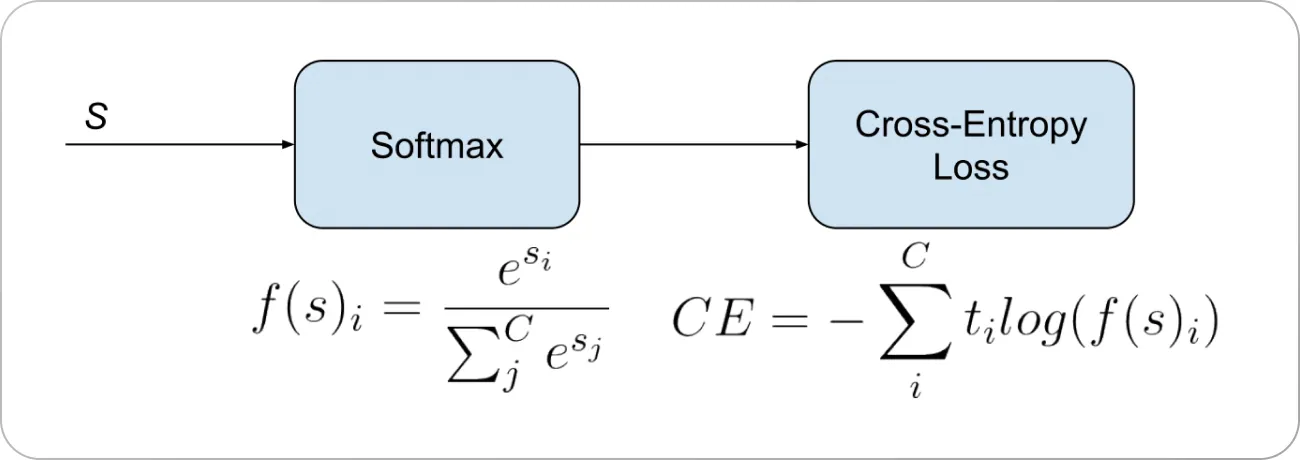

In [8]:
t=[0,0,1,0,0, 0,0,0,0,0]
y1=[0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
y2=[0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0]

aa1=cross_entropy_error(np.array(y1), np.array(t))
aa2=cross_entropy_error(np.array(y2), np.array(t))

print('예측값이 2일 경우:', aa1)
print('예측값이 7일 경우:', aa2)
# 결과(오차 값)가  더 작은 첫번째 추정(aa1)이 정답일 가능성이 높다고 판단한 것으로, 앞서 오차제곱합의 판단과 일치.

예측값이 2일 경우: 0.510825457099338
예측값이 7일 경우: 2.302584092994546


**미니배치 학습**

In [9]:
# 기계학습 문제는 훈련 데이터를 사용해 학습합니다.
# 더 구체적으로 말하면, 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아냅니다.
# 이렇게 하려면 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 합니다.
# 신경망 학습에서도 훈련 데이터로부터 일부만 골라 학습을 수행합니다. : 미니배치(mini batch)

In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # 60000*784
print(t_train.shape) # 60000*10

In [ ]:
def cross_entropy_error(y,t):
  if y.ndim == 1:
    t=t.reshape(1,t.size)
    y=y.shape(1,y.size)

  batch_size=y.shape[0]
  return -np.sum(t*np.log(y+1e-7))/batch_size

**왜 손실 함수를 설정하는가?**

In [ ]:
# 예컨대 숫자 인식의 경우도 우리의 궁극적인 목적은 높은 '정확도'를 끌어내는 매개변수 값을 찾는 것입니다.
# 그렇다면 '정확도'라는 지표를 놔두고, '손실함수의'값이라는 우회적인 방법을 택하는 이유는 뭘까요?

# 신경망 학습에서는 최적의 매개변수(가중치와 편향)를 탐색할 때, 손실함수의 값을 가능한 작게 하는 매개변수 값을 찾습니다.
# 이때 매개변수의 미분을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복합니다.

# 가중치 매개변수의 손실함수의 미분: '가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하나'라는 말입니다.

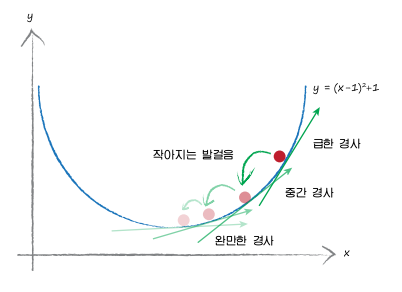

In [ ]:
# 만약 이 미분 값(가중치 매개변수의 손실함수의 미분)이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다.
# 반대로, 미분 값이 양수면 가중치 매개변수를 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있습니다.

# 그러나 미분 값이 0이면 가중치 매개변수를 어느쪽으로 움직여도 손실 함수의 값은 줄어들지 않습니다. 그래서 가중치 매개변수의 갱신은
# 거기서 멈춥니다.

# 정확도를 지표로 삼아서는 안 되는 이유: 미분 값이 대부분의 장소에서 0이 되어, 매개변수를 갱신할 수 없기 때문.

# 예) 한 신경망이 100장의 훈련 데이터 중 32장을 올바로 인식한다고 합니다.
# 정확도: 32%-> 매개변수를 약간만 조정해서는 정확도가 개선되지 않고 일정하게 유지됩니다.

In [ ]:
# 정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화힙니다.

# 계단함수를 활성화 함수로 사용하면, 손실 함수를 지표로 삼는 게 아무 의미가 없게 됩니다.
# 매개변수의 작은 변화가 주는 파장을 계단 함수가 말살하여 손실 함수의 값에는 아무런 변화가 나타나지 않기 때문입니다.

**+) N차원 배열 생성**

In [16]:
import numpy as np

# 1차원 배열 생성
arr_1d = np.array([1, 2, 3, 4, 5])
print("1D array:")
print(arr_1d)
print("Number of dimensions:", arr_1d.ndim)  # 출력: 1

# 2차원 배열 생성
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])
print("\n2D array:")
print(arr_2d)
print("Number of dimensions:", arr_2d.ndim)  # 출력: 2

# 3차원 배열 생성
arr_3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print("\n3D array:")
print(arr_3d)
print("Number of dimensions:", arr_3d.ndim)  # 출력: 3

# ndim: numpy에서 배열의 차원을 나타내는 속성.

1D array:
[1 2 3 4 5]
Number of dimensions: 1

2D array:
[[1 2 3]
 [4 5 6]]
Number of dimensions: 2

3D array:
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
Number of dimensions: 3


In [18]:
print('arr_1d.shape값:', arr_1d.shape)
print('arr_1d.shape[0]값:',arr_1d.shape[0])
if arr_1d.ndim ==1:
  arr_1dd=arr_1d.reshape(1,arr_1d.size)
  print(arr_1dd)
print('arr_1d.shape값:', arr_1d.shape)
print('arr_1d.shape[0]값:',arr_1d.shape[0])

arr_1d.shape값: (5,)
arr_1d.shape[0]값: 5
[[1 2 3 4 5]]
arr_1d.shape값: (5,)
arr_1d.shape[0]값: 5
